<a href="https://colab.research.google.com/github/sarmadsaleem333/Cat-Dog-Classification-using-Pretrained-Model-MobileNet-/blob/main/Cat_Vs_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle competitions download -c dogs-vs-cats


 98% 795M/812M [00:04<00:00, 180MB/s]
100% 812M/812M [00:04<00:00, 176MB/s]


In [ ]:
#extracting dataset

from zipfile import ZipFile
dataset="/content/dogs-vs-cats.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The datset is extracted")

The datset is extracted


In [ ]:
#extracting dataset

from zipfile import ZipFile
dataset="/content/train.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The datset is extracted")

The datset is extracted


In [ ]:
#extracting dataset

from zipfile import ZipFile
dataset="/content/test1.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The datset is extracted")

The datset is extracted


In [ ]:
#counting number of files in train folder
import os
path,dirs,files=next(os.walk("/content/train"))
file_count=len(files)
print("Number of images are :",file_count)

Number of images are : 25000


In [ ]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.5599.jpg', 'cat.3685.jpg', 'cat.12041.jpg', 'cat.3275.jpg', 'dog.6134.jpg', 'cat.5677.jpg', 'cat.9489.jpg', 'cat.10311.jpg', 'dog.9698.jpg', 'cat.2261.jpg', 'dog.9677.jpg', 'cat.7551.jpg', 'cat.9928.jpg', 'cat.5395.jpg', 'dog.6112.jpg', 'cat.2179.jpg', 'dog.753.jpg', 'dog.4413.jpg', 'cat.1279.jpg', 'cat.5316.jpg', 'cat.7891.jpg', 'cat.10627.jpg', 'cat.6126.jpg', 'dog.2348.jpg', 'cat.3144.jpg', 'dog.10323.jpg', 'dog.11381.jpg', 'dog.4881.jpg', 'cat.8425.jpg', 'cat.3584.jpg', 'cat.1634.jpg', 'cat.711.jpg', 'cat.5877.jpg', 'dog.3345.jpg', 'cat.1606.jpg', 'dog.4191.jpg', 'cat.5884.jpg', 'dog.8153.jpg', 'dog.8882.jpg', 'cat.11565.jpg', 'cat.9946.jpg', 'cat.12165.jpg', 'dog.11602.jpg', 'dog.3605.jpg', 'cat.10994.jpg', 'dog.3426.jpg', 'dog.8739.jpg', 'cat.120.jpg', 'cat.7163.jpg', 'dog.11481.jpg', 'cat.6206.jpg', 'cat.12455.jpg', 'cat.6136.jpg', 'cat.6449.jpg', 'cat.79.jpg', 'cat.3866.jpg', 'cat.174.jpg', 'cat.7803.jpg', 'dog.833.jpg', 'dog.4254.jpg', 'dog.4725.jpg', 'cat.5419.jpg', 'ca

In [ ]:
import numpy  as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


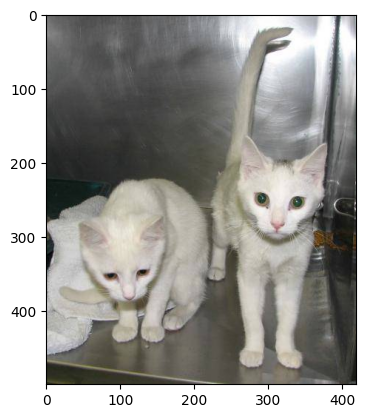

In [ ]:
img =mpimg.imread("/content/train/cat.12041.jpg")
imgplt=plt.imshow(img)
plt.show()

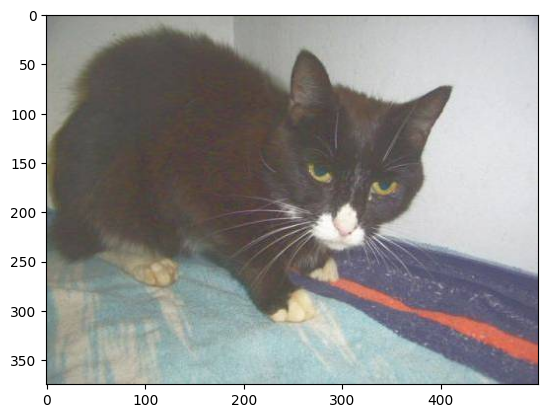

In [ ]:
img =mpimg.imread("/content/train/cat.5599.jpg")
imgplt=plt.imshow(img)
plt.show()

In [ ]:
file_names=os.listdir('/content/train')

for  i in  range(5):
  name =file_names[i]
  print(name[0:3])


cat
cat
cat
cat
dog


In [ ]:
#counting images

file_names=os.listdir('/content/train')

dog_count=0
cat_count=0

for  img_file in file_names:
  name=img_file[0:3]
  if name=="dog":
    dog_count+=1
  else:
    cat_count+=1

print("Dog Count",dog_count)
print("Cat Count",cat_count)


Dog Count 12500
Cat Count 12500


In [27]:
#resizing all images and storing them in a directory
os.mkdir('/content/image_resized')

In [28]:
original_folder='/content/train/'
resized_folder='/content/image_resized/'

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+filename
  img=Image.open(img_path)
  img.resize((224,224))
  img=img.convert('RGB')
  newImgPath=resized_folder+filename
  img.save(newImgPath)

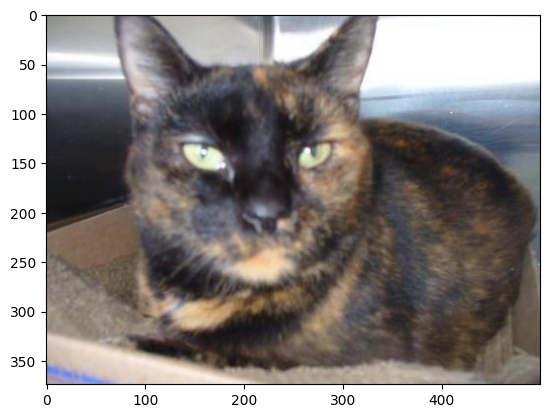

In [31]:
img=mpimg.imread('/content/image_resized/cat.10212.jpg')

imgplot=plt.imshow(img)
plt.show()

In [34]:
# creating labels for cat and dog classification

filenames=os.listdir('/content/image_resized/')

labels=[]

for i in range(2000):
  file_name=file_names[i]
  label=file_name[0:3]

  if label=='dog':
    labels.append(1)
  else:
    labels.append(0)


In [36]:
print(filenames[0:5])
print(len(filenames))

print(labels[0:5])
print(len(labels))

['cat.5599.jpg', 'cat.3685.jpg', 'cat.12041.jpg', 'cat.3275.jpg', 'dog.6134.jpg']
2000
[0, 0, 0, 0, 1]
2000


In [37]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1019  981]


In [40]:

import cv2
import glob

image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []
[files.extend(glob.glob(image_directory + "*." + e)) for e in image_extension]

# dog_cat_images = np.asarray([cv2.imread(file) for file in files])

# Read, resize, and convert images to a NumPy array
dog_cat_images = []
for file in files:
    img = cv2.imread(file)
    if img is not None:
        resized_img = cv2.resize(img, (224, 224))
        dog_cat_images.append(resized_img)

dog_cat_images = np.asarray(dog_cat_images)





In [41]:
print(dog_cat_images)

[[[[126 127 126]
   [129 130 128]
   [130 131 129]
   ...
   [186 176 174]
   [181 171 168]
   [181 169 167]]

  [[127 128 126]
   [130 131 129]
   [131 132 130]
   ...
   [189 180 177]
   [183 174 171]
   [181 169 167]]

  [[129 130 127]
   [131 133 130]
   [133 134 132]
   ...
   [191 182 179]
   [185 176 173]
   [182 172 169]]

  ...

  [[123 127 115]
   [129 134 119]
   [129 134 119]
   ...
   [114  91  92]
   [112  88  91]
   [110  89  92]]

  [[129 133 121]
   [133 138 123]
   [131 136 121]
   ...
   [113  89  91]
   [111  87  90]
   [108  87  90]]

  [[134 138 126]
   [137 142 126]
   [132 137 122]
   ...
   [113  89  91]
   [113  89  92]
   [109  88  91]]]


 [[[ 64  61  56]
   [ 47  43  38]
   [ 49  39  35]
   ...
   [ 33  38  29]
   [ 30  28  27]
   [ 36  32  31]]

  [[ 30  28  20]
   [ 69  66  58]
   [167 159 152]
   ...
   [ 37  41  37]
   [ 12  10   9]
   [  7   5   4]]

  [[ 42  42  33]
   [ 71  69  60]
   [ 34  28  20]
   ...
   [ 11   9  10]
   [ 34  32  32]
   [ 42  40

In [42]:
type(dog_cat_images)

numpy.ndarray

In [43]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [44]:
X=dog_cat_images
Y=np.asarray(labels)

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [46]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [51]:
import tensorflow as tf
import tensorflow_hub as hub



pretraied_model=hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=(224, 224, 3), trainable=False)



In [52]:
num_of_classes=2
model=tf.keras.Sequential(

                  [
                      pretraied_model,
                      tf.keras.layers.Dense(num_of_classes)

                  ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [54]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])



In [55]:
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 71s 1s/step - loss: 0.2430 - acc: 0.8975
Epoch 2/5
50/50 [==============================] - 67s 1s/step - loss: 0.0638 - acc: 0.9750
Epoch 3/5
50/50 [==============================] - 81s 2s/step - loss: 0.0437 - acc: 0.9862
Epoch 4/5
50/50 [==============================] - 66s 1s/step - loss: 0.0297 - acc: 0.9894
Epoch 5/5
50/50 [==============================] - 66s 1s/step - loss: 0.0214 - acc: 0.9950


In [57]:
loss,acc=model.evaluate(X_test_scaled,Y_test)
print("Test loss:",loss)
print("Test Accuracy:",acc)

13/13 [==============================] - 17s 1s/step - loss: 0.0565 - acc: 0.9750
Test loss: 0.05648304522037506
Test Accuracy: 0.9750000238418579


Path of image to predict /content/test.jpg


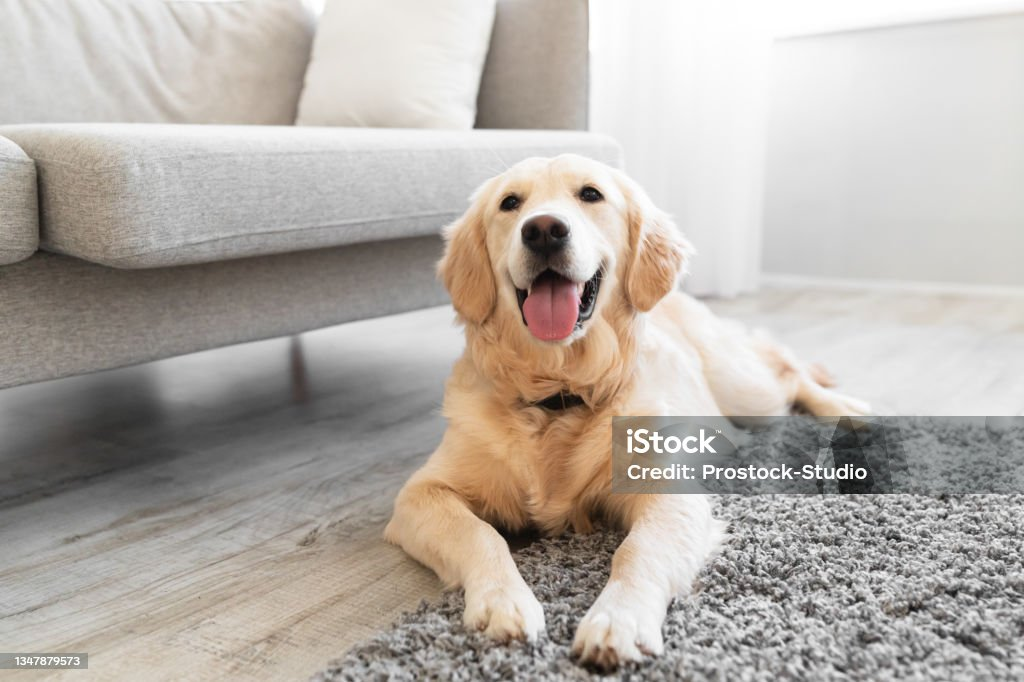

1/1 [==============================] - 0s 88ms/step
It is dog


In [59]:
input_image_path=input("Path of image to predict ")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255


image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if(input_pred_label==0):
  print("It is cat")
else:
  print("It is dog")

Path of image to predict /content/test2.jpeg


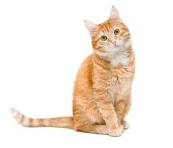

1/1 [==============================] - 0s 54ms/step
It is cat


In [60]:
input_image_path=input("Path of image to predict ")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255


image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if(input_pred_label==0):
  print("It is cat")
else:
  print("It is dog")

Path of image to predict /content/test3.jpeg


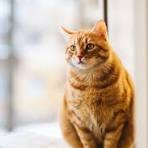

1/1 [==============================] - 0s 50ms/step
It is cat


In [61]:
input_image_path=input("Path of image to predict ")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255


image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if(input_pred_label==0):
  print("It is cat")
else:
  print("It is dog")

Path of image to predict /content/test4.jpeg


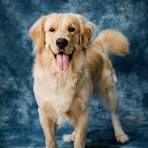

1/1 [==============================] - 0s 58ms/step
It is dog


In [62]:
input_image_path=input("Path of image to predict ")
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize=cv2.resize(input_image,(224,224))
input_image_scaled=input_image_resize/255


image_reshaped=np.reshape(input_image_scaled,[1,224,224,3])
input_prediction=model.predict(image_reshaped)
input_pred_label=np.argmax(input_prediction)

if(input_pred_label==0):
  print("It is cat")
else:
  print("It is dog")